In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Analysis

### Reading dataset

In [2]:
data = pd.read_excel(r"C:\Users\HP\Downloads\iris (2).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Basic informations

In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

### Data visualization

In [8]:
count = data.value_counts('Classification')
lab = data.Classification.unique()
print(count)

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


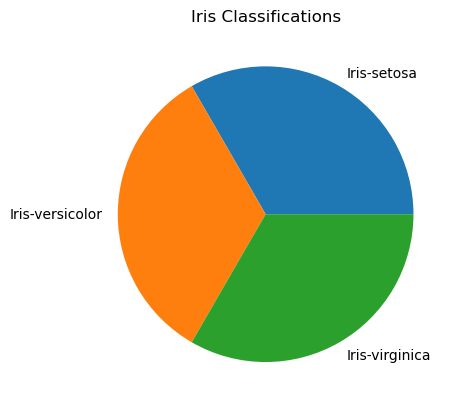

In [9]:
plt.pie(count, labels=lab)
plt.title('Iris Classifications')
plt.show()

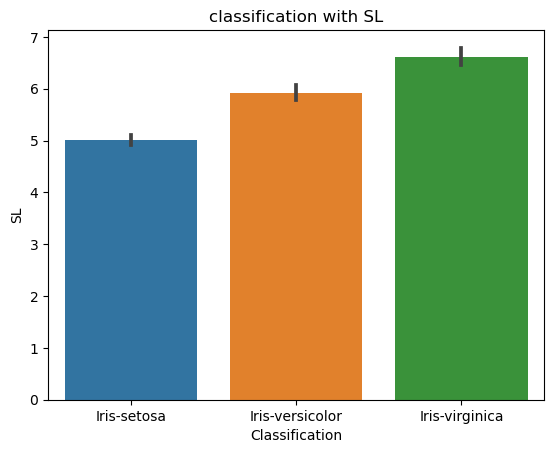

In [10]:
sns.barplot(x='Classification',y='SL',data=data)
plt.title('classification with SL')
plt.show()

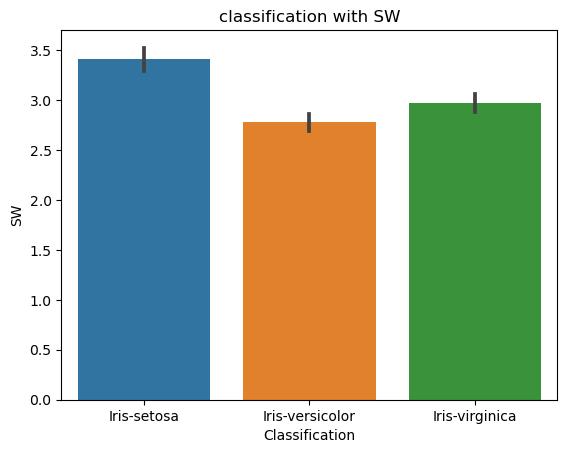

In [11]:
sns.barplot(x='Classification',y='SW',data=data)
plt.title('classification with SW')
plt.show()

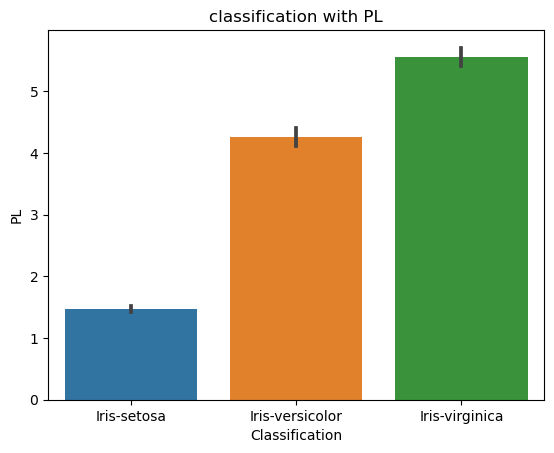

In [12]:
sns.barplot(x='Classification',y='PL',data=data)
plt.title('classification with PL')
plt.show()

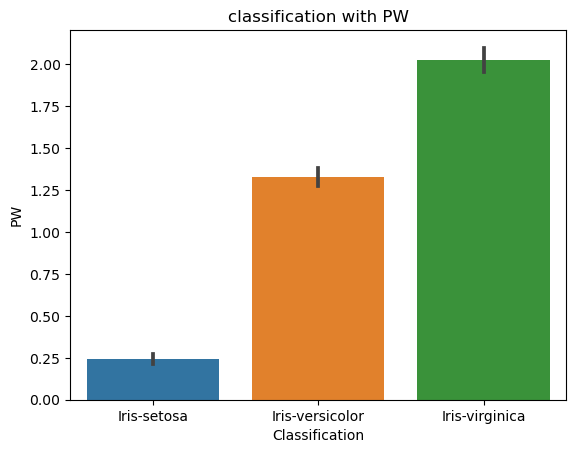

In [13]:
sns.barplot(x='Classification',y='PW',data=data)
plt.title('classification with PW')
plt.show()

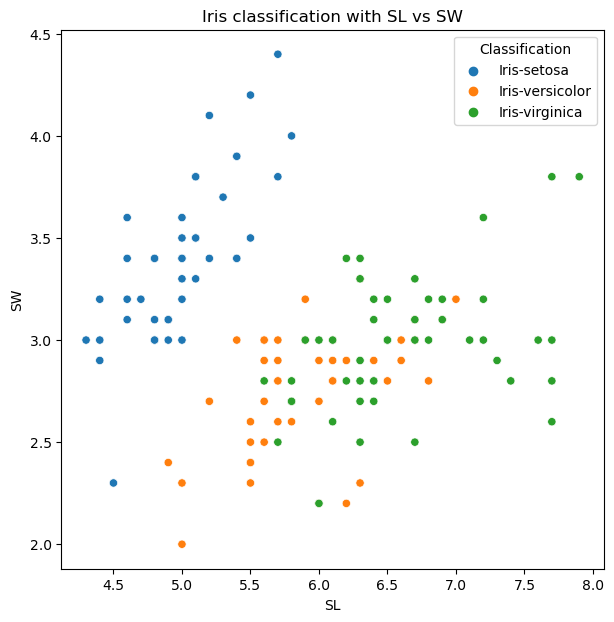

In [14]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x='SL',y='SW',data=data,hue='Classification')
plt.title('Iris classification with SL vs SW')
plt.show()

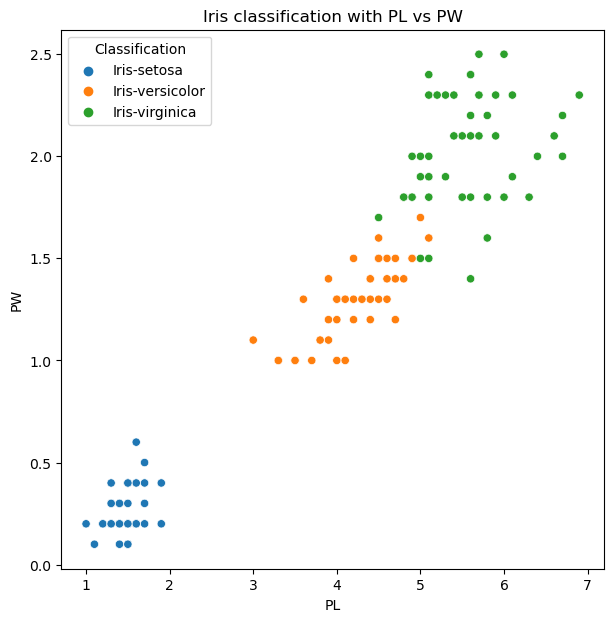

In [15]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x='PL',y='PW',data=data,hue='Classification')
plt.title('Iris classification with PL vs PW')
plt.show()

## Data Preprocessing

### Checking for null values

In [16]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### Handling Missing values

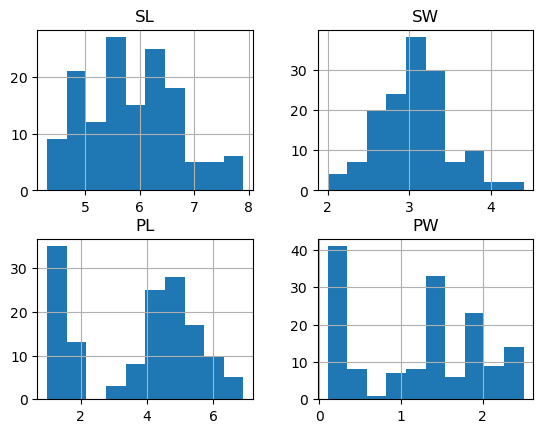

In [17]:
freqgraph = data.select_dtypes(include=['float'])
freqgraph.hist()
plt.show()

In [18]:
for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].median())

In [19]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

### Checking Outliers

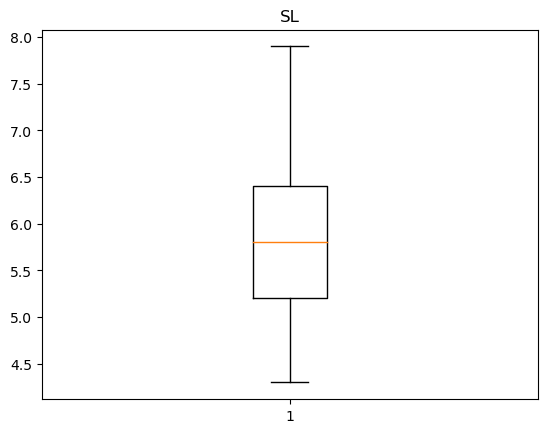

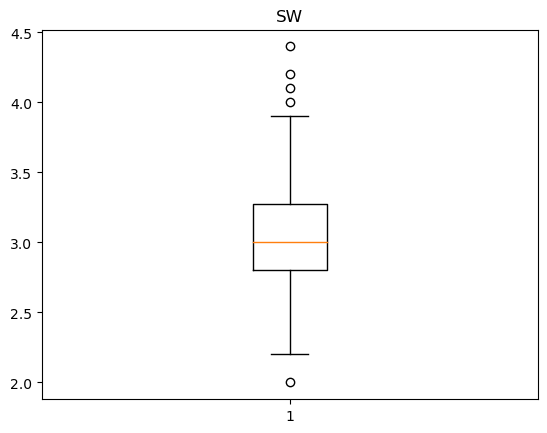

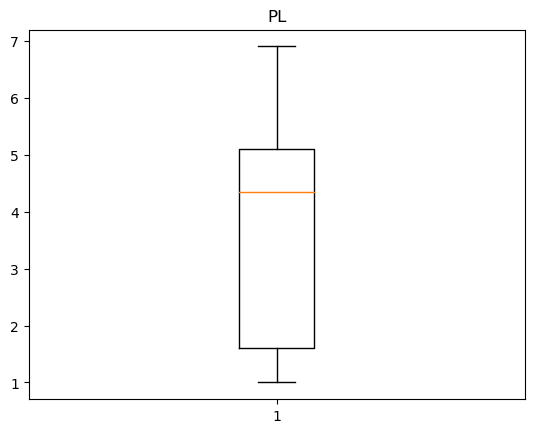

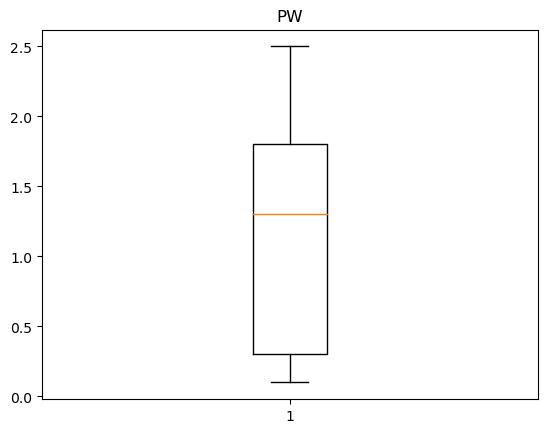

In [20]:
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

### Handling Outliers

In [21]:
Q1 = data['SW'].quantile(0.25)
Q3 = data['SW'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
data['SW']=np.where(data['SW']>up_lim,up_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

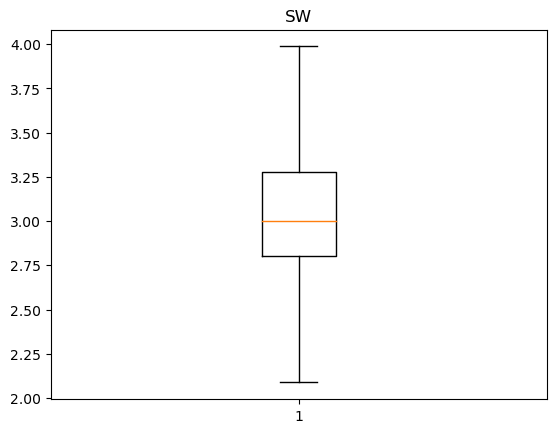

In [22]:
plt.boxplot(data['SW'])
plt.title('SW')
plt.show()

###  Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Classification']= le.fit_transform(data['Classification'])

In [24]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Supervised learning

### Classification

In [25]:
X = data.drop(['Classification'],axis=1)  # features
y = data['Classification']   #target

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=100)

## 1 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy = ',accuracy_score(y_test,y_pred_log))
print('Precision = ',precision_score(y_test,y_pred_log,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_log,average='macro'))
print('f1 = ',f1_score(y_test,y_pred_log,average='macro'))

Accuracy =  0.9210526315789473
Precision =  0.9155844155844157
Recall =  0.919047619047619
f1 =  0.916225749559083


In [33]:
confusion_matrix(y_test,y_pred_log)

array([[13,  1,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]], dtype=int64)

## 2 kNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier
metric =[]
neighbors = np.arange(2,20)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors =k, metric ='minkowski',p=2)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    acc= accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

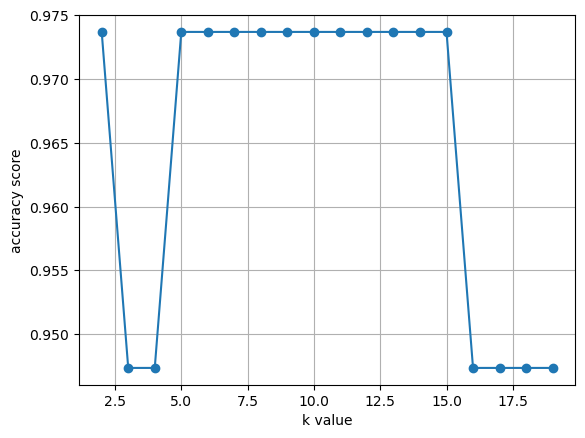

In [30]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()

In [31]:
classifier = KNeighborsClassifier(n_neighbors = 12, metric ='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy =',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_log,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_log,average='macro'))
print('f1 = ',f1_score(y_test,y_pred_log,average='macro'))

Accuracy = 0.9736842105263158
Precision =  0.9155844155844157
Recall =  0.919047619047619
f1 =  0.916225749559083


In [34]:
confusion_matrix(y_test,y_pred_knn)

array([[13,  1,  0],
       [ 0, 10,  0],
       [ 0,  0, 14]], dtype=int64)

## Standard Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [37]:
X = std.fit_transform(X)
X = pd.DataFrame(X)

In [38]:
# Logistic Regresion
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)

In [39]:
print('Accuracy = ',accuracy_score(y_test,y_pred_log))
print('Precision = ',precision_score(y_test,y_pred_log,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_log,average='macro'))
print('f1 = ',f1_score(y_test,y_pred_log,average='macro'))

Accuracy =  0.9210526315789473
Precision =  0.9155844155844157
Recall =  0.919047619047619
f1 =  0.916225749559083


In [40]:
confusion_matrix(y_test,y_pred_log)

array([[13,  1,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]], dtype=int64)

In [42]:
# kNN
classifier = KNeighborsClassifier(n_neighbors = 12, metric ='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)

In [43]:
print('Accuracy =',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_log,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_log,average='macro'))
print('f1 = ',f1_score(y_test,y_pred_log,average='macro'))

Accuracy = 0.9736842105263158
Precision =  0.9155844155844157
Recall =  0.919047619047619
f1 =  0.916225749559083


#### kNN is the better model for Iris Classification prediction